# Credit Card Fraud Detection

## Data Loading and Initial Inspection

### Import Libraries

In [725]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns in the notebook
pd.set_option('display.max_columns', None)

### Load Dataset

In [726]:
# Load the dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


### 1.3 Dataset Shape & Size

In [727]:
# Dataset shape
df.shape

(100000, 7)

### Dataset Info

In [728]:
# Dataset information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB
None


### Statistical Summary

In [729]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


## Class Imbalance and Visualization

### Count of Fraud vs Non-Fraud

In [730]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['IsFraud'].value_counts()
print("Number of transactions by class:")
print(fraud_counts)

# Calculate the percentage of each class
fraud_percent = df['IsFraud'].value_counts(normalize=True) * 100
print("\nPercentage of transactions by class:")
print(fraud_percent)

Number of transactions by class:
IsFraud
0    99000
1     1000
Name: count, dtype: int64

Percentage of transactions by class:
IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64


### Visualizing Class Distribution

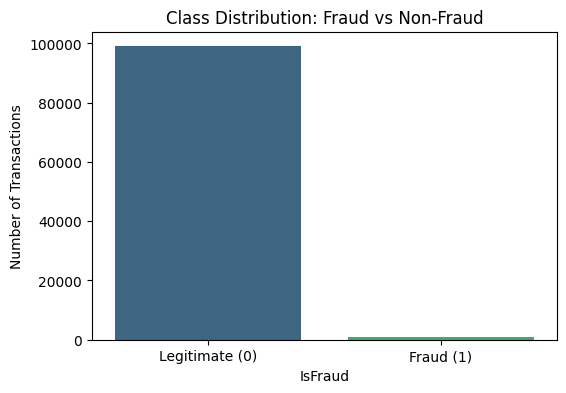

In [731]:
# Bar plot for class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', hue='IsFraud', data=df, palette='viridis', legend=False)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('IsFraud')
plt.ylabel('Number of Transactions')
plt.xticks([0,1], ['Legitimate (0)', 'Fraud (1)'])
plt.show()

## Exploratory Data Analysis (EDA)

### Statistical Summary of Features

In [732]:
# Select numeric columns
numeric_features = ['Amount']

# Display summary statistics
print("Statistical Summary of Numeric Features:")
display(df[numeric_features].describe())

Statistical Summary of Numeric Features:


,Amount
count,100000.000000
mean,2497.092666
std,1442.415999
min,1.050000
25%,1247.955000
50%,2496.500000
75%,3743.592500
max,4999.770000


### Visualization of Class Distributions

#### Histogram of Transaction Amount by Class

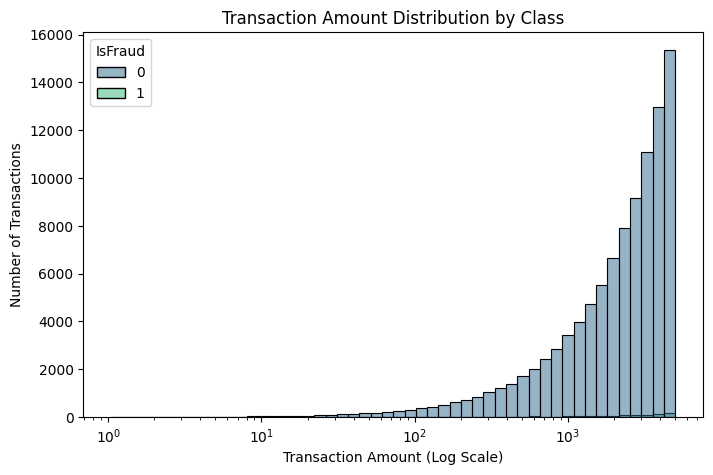

In [733]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Amount', hue='IsFraud', bins=50, palette='viridis', log_scale=True)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Number of Transactions')
plt.show()

#### Boxplot of Transaction Amount by Class

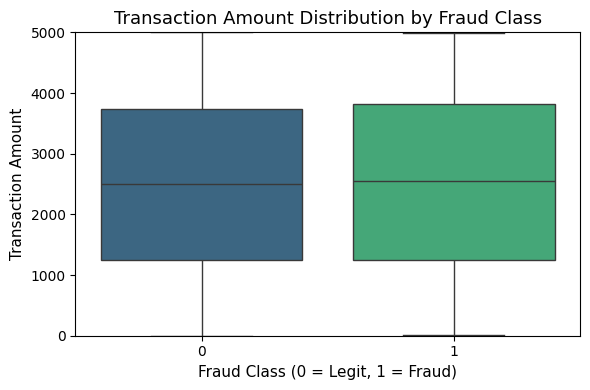

In [734]:
plt.figure(figsize=(6, 4))

sns.boxplot(x='IsFraud', y='Amount', hue='IsFraud', data=df, palette='viridis', legend=False)

plt.title('Transaction Amount Distribution by Fraud Class', fontsize=13)
plt.xlabel('Fraud Class (0 = Legit, 1 = Fraud)', fontsize=11)
plt.ylabel('Transaction Amount', fontsize=11)
plt.ylim(0, 5000)
plt.tight_layout()
plt.show()

### Correlation Analysis

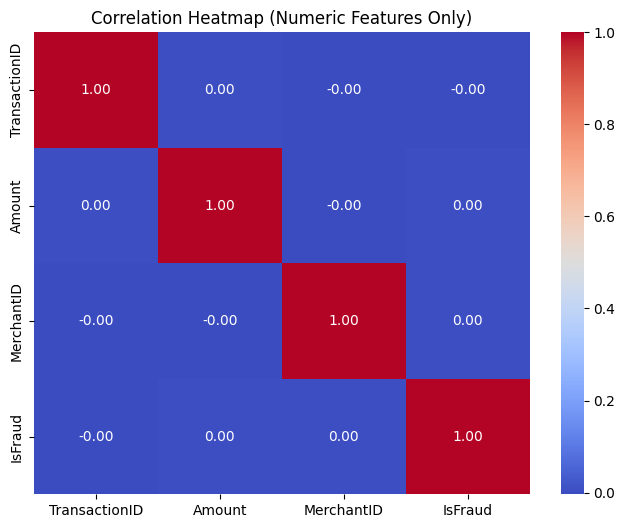

In [735]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

### Categorical Feature Analysis

#### Transaction Type Distribution

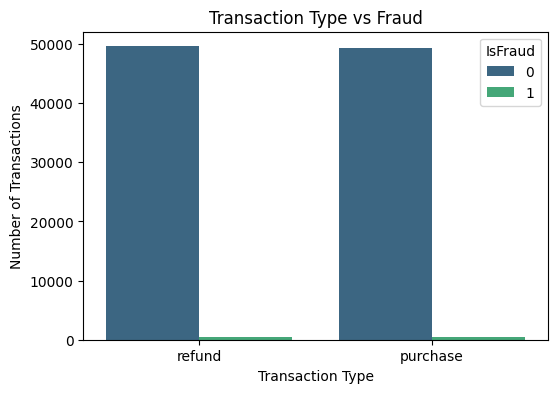

Fraud percentage by Transaction Type (%):


TransactionType
purchase    0.98859
refund      1.01135
Name: IsFraud, dtype: float64

In [736]:
# Countplot for TransactionType
plt.figure(figsize=(6,4))
sns.countplot(x='TransactionType', hue='IsFraud', data=df, palette='viridis')
plt.title('Transaction Type vs Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

# Percentage of frauds per TransactionType
transaction_fraud_rate = df.groupby('TransactionType')['IsFraud'].mean() * 100
print("Fraud percentage by Transaction Type (%):")
display(transaction_fraud_rate)

#### Merchant Fraud Analysis

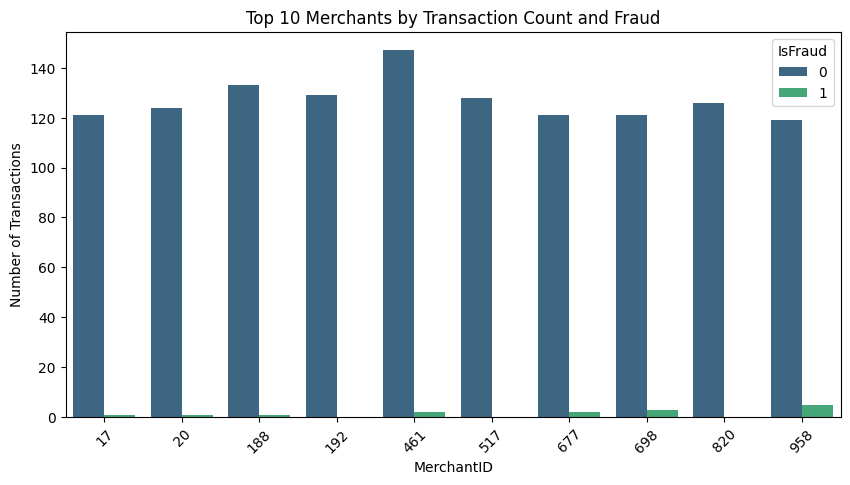

Fraud percentage for top 10 merchants (%):


MerchantID
17     0.819672
20     0.800000
188    0.746269
192    0.000000
461    1.342282
517    0.000000
677    1.626016
698    2.419355
820    0.000000
958    4.032258
Name: IsFraud, dtype: float64

In [737]:
# Top 10 merchants by number of transactions
top_merchants = df['MerchantID'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.countplot(x='MerchantID', hue='IsFraud', data=df[df['MerchantID'].isin(top_merchants)], palette='viridis')
plt.title('Top 10 Merchants by Transaction Count and Fraud')
plt.xlabel('MerchantID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Fraud rate per top merchant
merchant_fraud_rate = df[df['MerchantID'].isin(top_merchants)].groupby('MerchantID')['IsFraud'].mean() * 100
print("Fraud percentage for top 10 merchants (%):")
display(merchant_fraud_rate)

#### Location Fraud Analysis

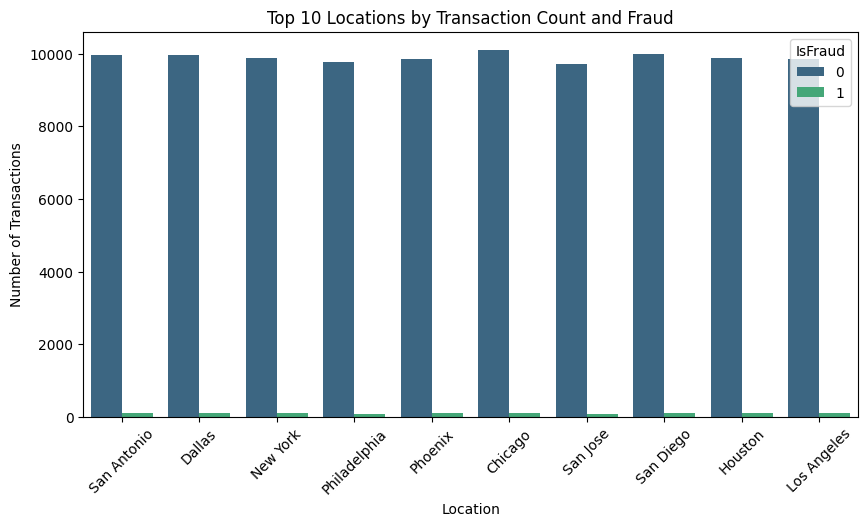

Fraud percentage for top 10 locations (%):


Location
Chicago         0.932012
Dallas          0.982533
Houston         1.050946
Los Angeles     0.956119
New York        1.160813
Philadelphia    0.911577
Phoenix         0.993976
San Antonio     0.983900
San Diego       1.137375
San Jose        0.887302
Name: IsFraud, dtype: float64

In [738]:
# Top 10 locations by number of transactions
top_locations = df['Location'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(x='Location', hue='IsFraud', data=df[df['Location'].isin(top_locations)], palette='viridis')
plt.title('Top 10 Locations by Transaction Count and Fraud')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Fraud rate per top location
location_fraud_rate = df[df['Location'].isin(top_locations)].groupby('Location')['IsFraud'].mean() * 100
print("Fraud percentage for top 10 locations (%):")
display(location_fraud_rate)

### Temporal Feature Analysis

#### Extract Time Features

In [739]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract Hour, Day of Week, Month
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek  # Monday=0
df['Month'] = df['TransactionDate'].dt.month

# Display first 5 rows with new features
display(df[['TransactionDate', 'Hour', 'DayOfWeek', 'Month']].head())

,TransactionDate,Hour,DayOfWeek,Month
0,2024-04-03 14:15:35.462794,14,2,4
1,2024-03-19 13:20:35.462824,13,1,3
2,2024-01-08 10:08:35.462834,10,0,1
3,2024-04-13 23:50:35.462850,23,5,4
4,2024-07-12 18:51:35.462858,18,4,7


#### Fraud Rate by Hour

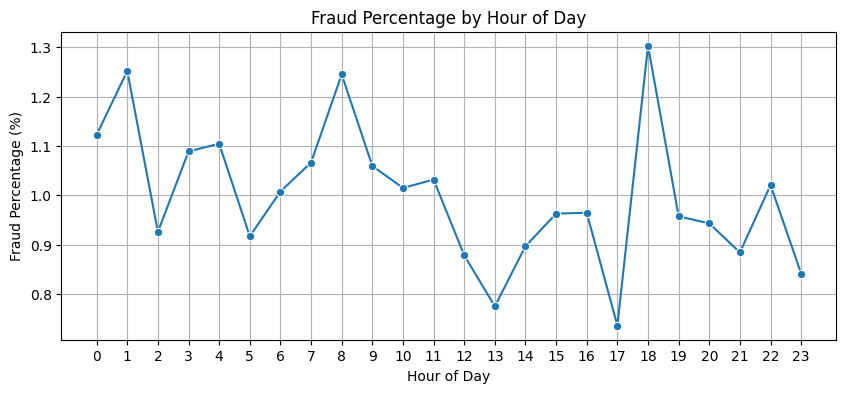

In [740]:
hourly_fraud = df.groupby('Hour')['IsFraud'].mean() * 100

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values, marker='o')
plt.title('Fraud Percentage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

#### Fraud Rate by Day of Week

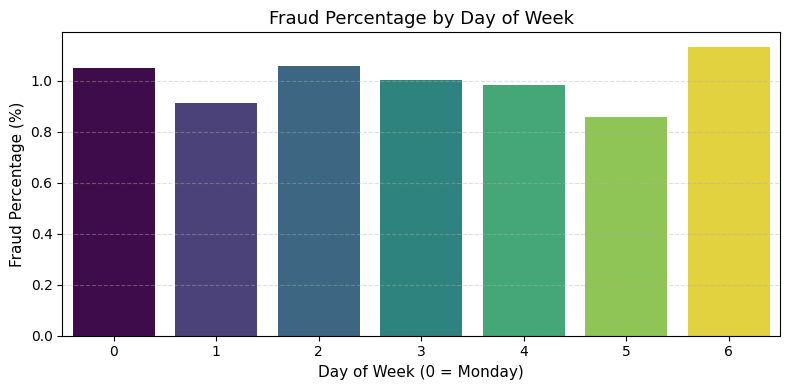

In [741]:
weekday_fraud = (df.groupby('DayOfWeek')['IsFraud'].mean().mul(100).reset_index())

plt.figure(figsize=(8, 4))

sns.barplot(
    data=weekday_fraud,
    x='DayOfWeek',
    y='IsFraud',
    hue='DayOfWeek',
    palette='viridis',
    legend=False
)

plt.title('Fraud Percentage by Day of Week', fontsize=13)
plt.xlabel('Day of Week (0 = Monday)', fontsize=11)
plt.ylabel('Fraud Percentage (%)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Fraud Rate by Month

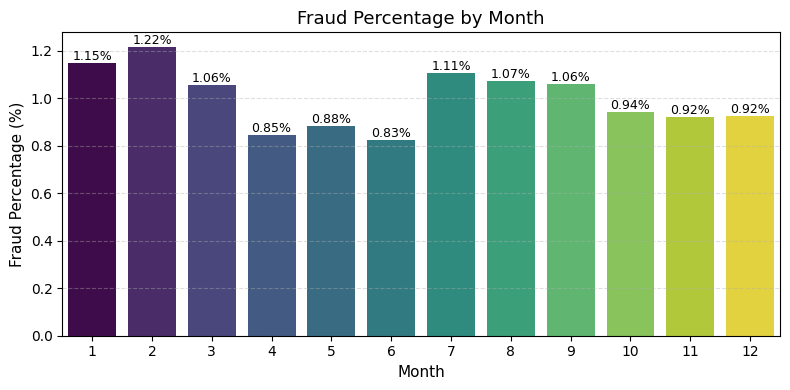

In [742]:
monthly_fraud = (df.groupby('Month')['IsFraud'].mean().mul(100).reset_index())

plt.figure(figsize=(8, 4))

ax = sns.barplot(data=monthly_fraud, x='Month', y='IsFraud', hue='Month', palette='viridis', legend=False)

plt.title('Fraud Percentage by Month', fontsize=13)
plt.xlabel('Month', fontsize=11)
plt.ylabel('Fraud Percentage (%)', fontsize=11)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Data Pre-processing

### Handling Missing Values

In [743]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
display(missing_values)

Missing values per column:


TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
Hour               0
DayOfWeek          0
Month              0
dtype: int64

### Scaling and Normalization

#### Identifying Numerical Features

In [744]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable
numerical_features.remove('IsFraud')

# Remove identifier columns
id_columns = ['TransactionID', 'MerchantID']
numerical_features = [col for col in numerical_features if col not in id_columns]

print("Final numerical features selected for scaling:")
numerical_features

Final numerical features selected for scaling:


['Amount']

#### Apply Standard Scaling

In [745]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display scaled features summary
df[numerical_features].describe()

,Amount
count,1.000000e+05
mean,-1.006484e-16
std,1.000005e+00
min,-1.730468e+00
25%,-8.660081e-01
50%,-4.108860e-04
75%,8.641793e-01
max,1.735068e+00


### Techniques for Imbalanced Data

#### Check Class Distribution

In [746]:
# Check class distribution
class_counts = df['IsFraud'].value_counts()

class_counts

IsFraud
0    99000
1     1000
Name: count, dtype: int64

#### Percentage Distribution

In [747]:
# Percentage distribution
class_percentage = df['IsFraud'].value_counts(normalize=True) * 100
class_percentage

IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64

#### Clean Count Plot

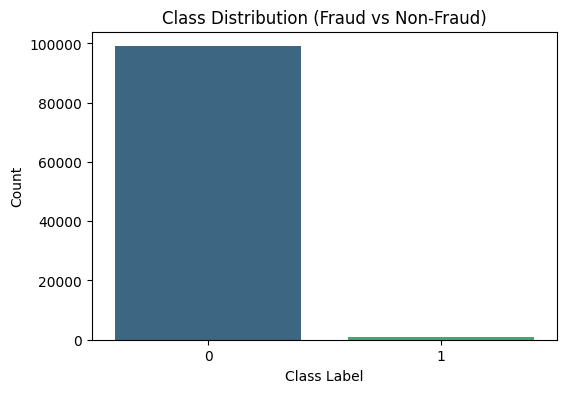

In [748]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', hue='IsFraud', data=df, palette='viridis', legend=False)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

#### Compute Class Weights

In [749]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
classes = np.array([0, 1])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=df['IsFraud']
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: 0.5050505050505051, 1: 50.0}

### Feature Selection and Engineering

#### Drop Non-Predictive Identifier

In [750]:
# Drop non-informative identifier
df = df.drop(columns=['TransactionID'])

df.head()

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Hour,DayOfWeek,Month
0,2024-04-03 14:15:35.462794,1.173161,688,refund,San Antonio,0,14,2,4
1,2024-03-19 13:20:35.462824,0.112740,109,refund,Dallas,0,13,1,3
2,2024-01-08 10:08:35.462834,-1.187661,394,purchase,New York,0,10,0,1
3,2024-04-13 23:50:35.462850,0.705284,944,purchase,Philadelphia,0,23,5,4
4,2024-07-12 18:51:35.462858,-1.475326,475,purchase,Phoenix,0,18,4,7


#### Time-Based Feature Engineering

##### Convert Date Column to Datetime

In [751]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TransactionDate'].head()

0   2024-04-03 14:15:35.462794
1   2024-03-19 13:20:35.462824
2   2024-01-08 10:08:35.462834
3   2024-04-13 23:50:35.462850
4   2024-07-12 18:51:35.462858
Name: TransactionDate, dtype: datetime64[ns]

##### Extract Time Features

In [752]:
# Extract temporal features
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionWeekday'] = df['TransactionDate'].dt.weekday

df[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionWeekday']].head()

,TransactionHour,TransactionDay,TransactionMonth,TransactionWeekday
0,14,3,4,2
1,13,19,3,1
2,10,8,1,0
3,23,13,4,5
4,18,12,7,4


##### Drop Original Date Column

In [753]:
df = df.drop(columns=['TransactionDate'])

df.head()

,Amount,MerchantID,TransactionType,Location,IsFraud,Hour,DayOfWeek,Month,TransactionHour,TransactionDay,TransactionMonth,TransactionWeekday
0,1.173161,688,refund,San Antonio,0,14,2,4,14,3,4,2
1,0.112740,109,refund,Dallas,0,13,1,3,13,19,3,1
2,-1.187661,394,purchase,New York,0,10,0,1,10,8,1,0
3,0.705284,944,purchase,Philadelphia,0,23,5,4,23,13,4,5
4,-1.475326,475,purchase,Phoenix,0,18,4,7,18,12,7,4


##### Drop Duplicate Time Features

In [754]:
# Drop redundant temporal features
redundant_features = ['Hour', 'DayOfWeek', 'Month']

df = df.drop(columns=redundant_features)

df.columns

Index(['Amount', 'MerchantID', 'TransactionType', 'Location', 'IsFraud',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionWeekday'],
      dtype='object')

#### Identify Categorical Features

In [755]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['TransactionType', 'Location']

#### Final Feature Overview

In [756]:
print("Numerical Features:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

print("\nCategorical Features:")
print(categorical_features)

print("\nTarget Variable:")
print(['IsFraud'])

Numerical Features:
['Amount', 'MerchantID', 'IsFraud']

Categorical Features:
['TransactionType', 'Location']

Target Variable:
['IsFraud']


## Model Development

### Train–Validation–Test Split Strategy

#### Separate Features and Target

In [757]:
# Separate features and target variable
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

X.shape, y.shape

((100000, 8), (100000,))

#### Train–Test Split

In [758]:
from sklearn.model_selection import train_test_split

# Initial train-test split (80% train, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_temp.shape

((80000, 8), (20000, 8))

#### Validation–Test Split

In [759]:
# Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

X_val.shape, X_test.shape

((10000, 8), (10000, 8))

#### Verify Class Distribution Preservation

In [760]:
def class_distribution(y, name):
    print(f"{name} class distribution:")
    print(y.value_counts(normalize=True) * 100)
    print()

class_distribution(y_train, "Training")
class_distribution(y_val, "Validation")
class_distribution(y_test, "Test")

Training class distribution:
IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64

Validation class distribution:
IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64

Test class distribution:
IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64



### Evaluation Metrics

#### Import Evaluation Metrics

In [761]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

## Transformer-Based Tabular Fraud Detection Model

### Model Architechture

#### Identify Feature Groups

In [762]:
# Numerical features (already scaled)
numerical_features = [
    'Amount',
    'TransactionHour',
    'TransactionDay',
    'TransactionMonth',
    'TransactionWeekday'
]

# Categorical features (to be embedded)
categorical_features = [
    'MerchantID',
    'TransactionType',
    'Location'
]

numerical_features, categorical_features

(['Amount',
  'TransactionHour',
  'TransactionDay',
  'TransactionMonth',
  'TransactionWeekday'],
 ['MerchantID', 'TransactionType', 'Location'])

#### Import Required Deep Learning Modules

In [763]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Dense, Embedding, LayerNormalization,
    MultiHeadAttention, Dropout, Concatenate, Flatten
)
from tensorflow.keras.models import Model

### Input Embedding and Attention Layers

#### Define Inputs and embedding

In [764]:
# Numerical inputs
num_input = Input(shape=(len(numerical_features),), name='numerical_input')

# Categorical inputs and embeddings
cat_inputs = []
cat_embeds = []

for cat_col in categorical_features:
    n_unique = df[cat_col].nunique()
    input_cat = Input(shape=(1,), name=f'{cat_col}_input')
    
    # Embedding layer
    embed_cat = Embedding(
        input_dim=n_unique + 1,       # +1 for unseen categories
        output_dim=min(50, n_unique // 2 + 1),  # heuristic
        name=f'{cat_col}_embed'
    )(input_cat)
    
    # Flatten embedding to concatenate later
    embed_cat = Flatten()(embed_cat)
    
    cat_inputs.append(input_cat)
    cat_embeds.append(embed_cat)

print("Categorical embeddings created and flattened.")

Categorical embeddings created and flattened.


#### Combine Features and Project for Attention

In [765]:
# Concatenate numerical + categorical embeddings
x = Concatenate()( [num_input] + cat_embeds )

# Project to embedding dimension for MultiHeadAttention
embedding_dim = 32  # can be adjusted
x = Dense(embedding_dim, activation='relu', name='feature_projection')(x)

print("Features concatenated and projected to embedding dimension:", embedding_dim)

Features concatenated and projected to embedding dimension: 32


#### Transformer Encoder Block

In [766]:
from tensorflow.keras.layers import Reshape, Add, LayerNormalization, Dense, MultiHeadAttention

# Reshape to 3D for attention: (batch_size, sequence_length=number_of_features, embedding_dim=1)
x_seq = Reshape((embedding_dim, 1))(x)  # Projected features -> sequence of 1-dim tokens

# Multi-head attention
attn_output = MultiHeadAttention(num_heads=4, key_dim=1, dropout=0.1)(x_seq, x_seq)

# Flatten the sequence dimension back to match residual
attn_output_flat = Flatten()(attn_output)

# Residual connection
x = Add()([x, attn_output_flat])
x = LayerNormalization()(x)

# Feed-forward network with residual
ff = Dense(embedding_dim, activation='relu')(x)
ff = Dense(embedding_dim, activation='relu')(ff)
x = Add()([x, ff])
x = LayerNormalization()(x)

print("Transformer encoder block applied with attention and feed-forward (Keras Functional API safe).")

Transformer encoder block applied with attention and feed-forward (Keras Functional API safe).


#### Classification Head

In [767]:
from tensorflow.keras.layers import Flatten, Dense

# Flatten for final classification
x_flat = Flatten()(x)

# Output layer: binary classification
output = Dense(1, activation='sigmoid', name='output')(x_flat)

# Define the full transformer model
transformer_model = Model(
    inputs=[num_input] + cat_inputs,
    outputs=output
)

transformer_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ MerchantID_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TransactionType_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Location_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MerchantID_embed    │ (None, 1, 50)     │     50,050 │ MerchantID_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TransactionType_em… │ (None, 1, 2)      │          6 │ TransactionType_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Location_embed      │ (None, 1, 6)      │         66 │ Location_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 50)        │          0 │ MerchantID_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 2)         │          0 │ TransactionType_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 6)         │          0 │ Location_embed[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 63)        │          0 │ numerical_input[… │
│ (Concatenate)       │                   │            │ flatten_6[0][0],  │
│                     │                   │            │ flatten_7[0][0],  │
│                     │                   │            │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_projection  │ (None, 32)        │      2,048 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 32, 1)     │          0 │ feature_projecti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 32, 1)     │         29 │ reshape_2[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 32)        │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 32)        │          0 │ feature_projecti… │
│                     │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 32)        │         64 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      1,056 │ layer_normalizat

 Total params: 54,472 (212.78 KB)

 Trainable params: 54,472 (212.78 KB)

 Non-trainable params: 0 (0.00 B)

### Loss Function and Optimizer

#### Define Loss

In [768]:
import tensorflow as tf

# Binary crossentropy loss for fraud detection
loss_fn = tf.keras.losses.BinaryCrossentropy()
loss_fn

<LossFunctionWrapper(<function binary_crossentropy at 0x158baab00>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

#### Define Optimizer

In [769]:
# Adam optimizer with a standard learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer

#### Compute Class Weights

In [770]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights from training labels (y_train)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format for Keras
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.5050505050505051, 1: 50.0}

#### Compile the Transformer Model

In [771]:
transformer_model.compile(
    loss=loss_fn,
    optimizer=optimizer,
    metrics=[
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

transformer_model

<Functional name=functional_2, built=True>

### Initial Training Results

#### Encode Categorical Features

In [772]:
from sklearn.preprocessing import LabelEncoder

# Make copies to avoid overwriting
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()

label_encoders = {}

for cat in categorical_features:
    le = LabelEncoder()
    # Fit on training only
    X_train_enc[cat] = le.fit_transform(X_train_enc[cat])
    # Transform validation using the same encoder
    X_val_enc[cat] = le.transform(X_val_enc[cat])
    label_encoders[cat] = le

print("Categorical features encoded for training and validation.")

Categorical features encoded for training and validation.


#### Prepare Training and Validation Inputs

In [773]:
# Prepare numerical + categorical inputs for Keras model
X_train_inputs = [X_train_enc[numerical_features]]  # numerical inputs
X_val_inputs = [X_val_enc[numerical_features]]

# Append categorical inputs
for cat in categorical_features:
    X_train_inputs.append(X_train_enc[cat])
    X_val_inputs.append(X_val_enc[cat])

# Check types and shapes
for inp in X_train_inputs:
    print(inp.shape, inp.dtypes)

(80000, 5) Amount                float64
TransactionHour         int32
TransactionDay          int32
TransactionMonth        int32
TransactionWeekday      int32
dtype: object
(80000,) int64
(80000,) int64
(80000,) int64


#### Train the Transformer Model

In [774]:
# Train the Transformer model
history = transformer_model.fit(
    X_train_inputs,
    y_train,
    validation_data=(X_val_inputs, y_val),
    epochs=10,
    batch_size=256,
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - auc: 0.5002 - loss: 0.7059 - precision: 0.0100 - recall: 0.5163 - val_auc: 0.4934 - val_loss: 0.7579 - val_precision: 0.0100 - val_recall: 0.9200
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - auc: 0.6715 - loss: 0.6376 - precision: 0.0159 - recall: 0.6575 - val_auc: 0.5114 - val_loss: 0.6967 - val_precision: 0.0104 - val_recall: 0.5200
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - auc: 0.7543 - loss: 0.5394 - precision: 0.0195 - recall: 0.8550 - val_auc: 0.5046 - val_loss: 0.6285 - val_precision: 0.0107 - val_recall: 0.5400
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - auc: 0.7782 - loss: 0.5052 - precision: 0.0199 - recall: 0.9025 - val_auc: 0.5065 - val_loss: 0.5883 - val_precision: 0.0099 - val_recall: 0.4700
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - auc: 0.7795 - loss: 0.4960 - precision: 0.0202 - recall: 0.9337 - val_auc: 0.5052 - val_loss: 0.6021 - val_precision: 0.0098 - val_recal

#### Plot Training Metrics

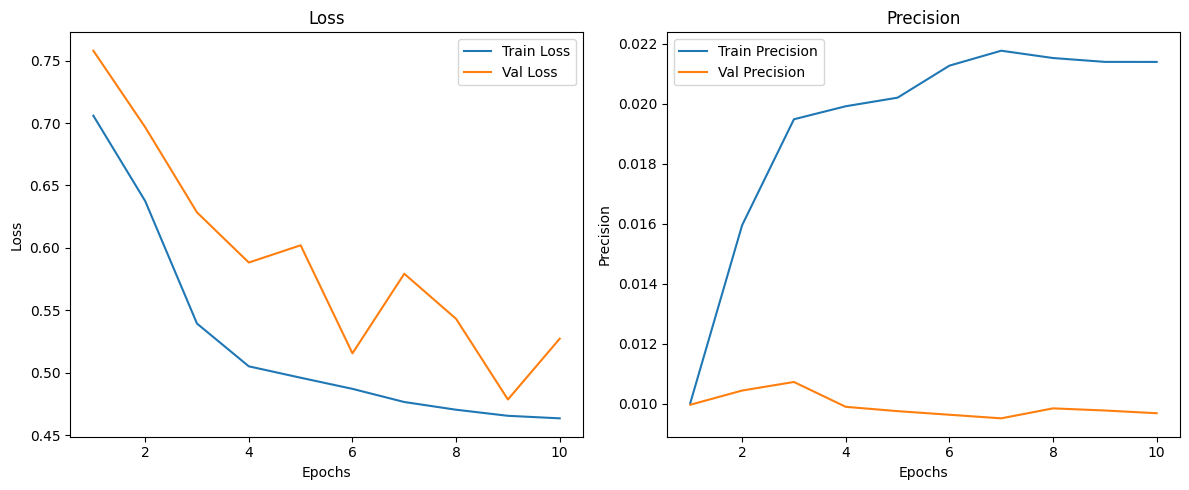

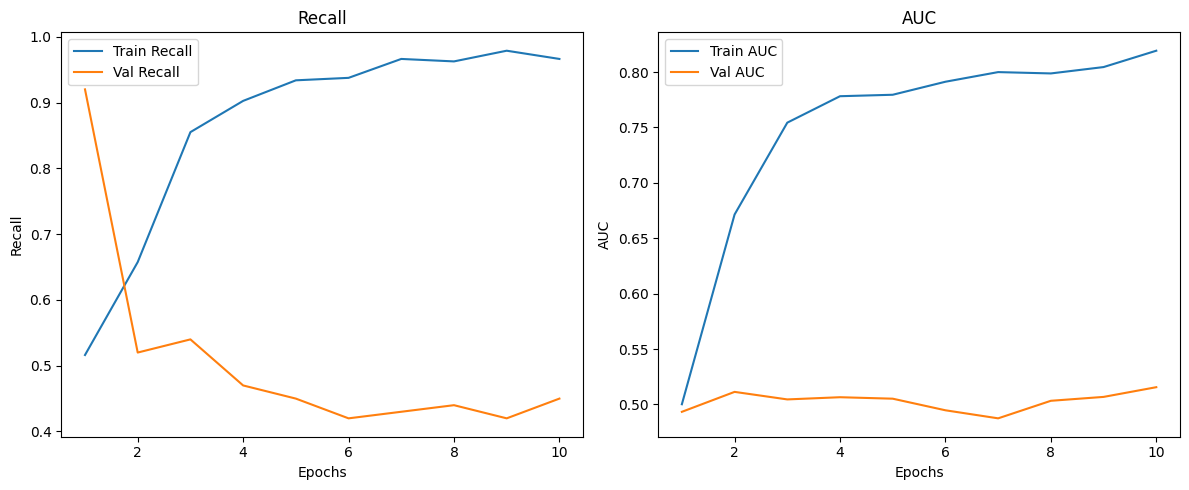

In [775]:
import matplotlib.pyplot as plt

# Extract metrics
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
auc = history.history['auc']
val_auc = history.history['val_auc']

epochs = range(1, len(loss)+1)

# Plot Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Precision
plt.subplot(1,2,2)
plt.plot(epochs, precision, label='Train Precision')
plt.plot(epochs, val_precision, label='Val Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Recall
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, recall, label='Train Recall')
plt.plot(epochs, val_recall, label='Val Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Plot AUC
plt.subplot(1,2,2)
plt.plot(epochs, auc, label='Train AUC')
plt.plot(epochs, val_auc, label='Val AUC')
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

## Graph Neural Network (GNN) Model

### Graph Construction from Tabular Data

#### Import Required Libraries

In [776]:
import torch
from torch_geometric.data import Data
import numpy as np

#### Prepare Node Features

In [777]:
# Combine numerical + categorical features as node features
node_features = X_train_enc[numerical_features + categorical_features].values

# Convert to PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)

#### Create Graph Edges Based on Shared Attributes

In [778]:
edge_index = []

# Create edges if two transactions share the same categorical value
for col in categorical_features:
    groups = X_train_enc.groupby(col).indices
    for _, idxs in groups.items():
        idxs = list(idxs)
        for i in range(len(idxs) - 1):
            edge_index.append([idxs[i], idxs[i + 1]])
            edge_index.append([idxs[i + 1], idxs[i]])  # bidirectional

#### Convert Edge Index to Tensor

In [779]:
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

print("Edge index shape:", edge_index.shape)

Edge index shape: torch.Size([2, 477976])


#### Define Labels

In [780]:
# Labels (fraud / non-fraud)
y = torch.tensor(y_train.values, dtype=torch.long)

#### Create Graph Data Object

In [781]:
graph_data = Data(
    x=x,
    edge_index=edge_index,
    y=y
)

graph_data

Data(x=[80000, 8], edge_index=[2, 477976], y=[80000])

#### Create Train / Val / Test Masks

In [782]:
import torch
from sklearn.model_selection import train_test_split

num_nodes = graph_data.num_nodes
indices = torch.arange(num_nodes)

# First split: train + temp
train_idx, temp_idx = train_test_split(
    indices,
    test_size=0.3,
    stratify=graph_data.y,
    random_state=42
)

# Second split: validation + test
val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.5,
    stratify=graph_data.y[temp_idx],
    random_state=42
)

# Initialize masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign masks
train_mask[train_idx] = True
val_mask[val_idx] = True
test_mask[test_idx] = True

# Attach masks to graph data
graph_data.train_mask = train_mask
graph_data.val_mask = val_mask
graph_data.test_mask = test_mask

### GNN Architecture and Node Relations

#### Import GNN Layers

In [783]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

#### Define the GNN Model

In [784]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class FraudGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(FraudGNN, self).__init__()

        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.classifier = torch.nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Node-level classification
        x = self.classifier(x)

        return x

#### Define Forward Pass (Message Passing)

In [785]:
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First message passing layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)

        # Second message passing layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Final classification
        out = self.classifier(x)

        return out

#### Instantiate the Model

In [786]:
num_features = graph_data.x.shape[1]
hidden_dim = 64
num_classes = 2

gnn_model = FraudGNN(
    num_features=num_features,
    hidden_dim=hidden_dim,
    num_classes=num_classes
)

### Loss Function and Optimizer

#### Import Required Modules

In [787]:
 import torch
import torch.nn as nn

#### Define Class Weights

In [788]:
# Count samples per class
class_counts = torch.bincount(
    graph_data.y[train_mask]
)

# Compute inverse frequency weights
class_weights = class_counts.sum() / class_counts

# Move to same device as model
class_weights = class_weights.to(next(gnn_model.parameters()).device)

class_weights

tensor([  1.0101, 100.0000])

#### Define Loss Function

In [789]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

#### Define Optimizer

In [790]:
optimizer = torch.optim.Adam(
    gnn_model.parameters(),
    lr=0.001,
    weight_decay=1e-4
)

#### Model Preparation Check

In [791]:
print(gnn_model)
print("Loss Function:", criterion)
print("Optimizer:", optimizer)

FraudGNN(
  (conv1): GCNConv(8, 64)
  (conv2): GCNConv(64, 64)
  (classifier): Linear(in_features=64, out_features=2, bias=True)
)
Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)


### Initial Training Results

#### Define Training Function

In [792]:
def train_gnn(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()

    out = model(data)
    loss = criterion(
        out[data.train_mask],
        data.y[data.train_mask]
    )

    loss.backward()
    optimizer.step()

    return loss.item()

#### Define Evaluation Function

In [793]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate_gnn(model, data, mask):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        probs = torch.softmax(logits, dim=1)[:, 1]
        preds = torch.argmax(logits, dim=1)

    y_true = data.y[mask].cpu().numpy()
    y_pred = preds[mask].cpu().numpy()
    y_prob = probs[mask].cpu().numpy()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return precision, recall, auc

#### Create History Storage

In [794]:
# GNN history dictionary to store metrics
gnn_history = {
    'train_loss': [],
    'val_loss': [],
    'train_precision': [],
    'val_precision': [],
    'train_recall': [],
    'val_recall': [],
    'train_auc': [],
    'val_auc': []
}

#### Training Loop

In [796]:
# Training loop for initial results
num_epochs = 30

for epoch in range(1, num_epochs + 1):
    # Train
    train_loss = train_gnn(gnn_model, graph_data, optimizer, criterion)
    
    # Evaluate on training set
    train_precision, train_recall, train_auc = evaluate_gnn(gnn_model, graph_data, graph_data.train_mask)
    
    # Evaluate on validation set
    val_precision, val_recall, val_auc = evaluate_gnn(gnn_model, graph_data, graph_data.val_mask)
    
    # Save metrics
    gnn_history['train_loss'].append(train_loss)
    gnn_history['train_precision'].append(train_precision)
    gnn_history['train_recall'].append(train_recall)
    gnn_history['train_auc'].append(train_auc)
    
    gnn_history['val_precision'].append(val_precision)
    gnn_history['val_recall'].append(val_recall)
    gnn_history['val_auc'].append(val_auc)
    
    # For simplicity, train_loss and val_loss will be same in GNN unless you compute val_loss separately
    gnn_history['val_loss'].append(train_loss)

    # Print
    print(
        f"Epoch {epoch:02d} | "
        f"Train Loss: {train_loss:.4f} | "
        f"Train Precision: {train_precision:.4f} | Train Recall: {train_recall:.4f} | Train AUC: {train_auc:.4f} | "
        f"Val Precision: {val_precision:.4f} | Val Recall: {val_recall:.4f} | Val AUC: {val_auc:.4f}"
    )

Epoch 01 | Train Loss: 0.7168 | Train Precision: 0.0100 | Train Recall: 1.0000 | Train AUC: 0.4998 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5292
Epoch 02 | Train Loss: 0.7896 | Train Precision: 0.0100 | Train Recall: 1.0000 | Train AUC: 0.4991 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5282
Epoch 03 | Train Loss: 0.7584 | Train Precision: 0.0099 | Train Recall: 0.8000 | Train AUC: 0.4917 | Val Precision: 0.0096 | Val Recall: 0.7750 | Val AUC: 0.5128


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 04 | Train Loss: 0.6954 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4895 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4740


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 05 | Train Loss: 0.7331 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4905 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4711


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 06 | Train Loss: 0.7626 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4890 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4811
Epoch 07 | Train Loss: 0.7141 | Train Precision: 0.0100 | Train Recall: 0.9768 | Train AUC: 0.4941 | Val Precision: 0.0102 | Val Recall: 0.9917 | Val AUC: 0.5195
Epoch 08 | Train Loss: 0.7001 | Train Precision: 0.0100 | Train Recall: 1.0000 | Train AUC: 0.4985 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5278
Epoch 09 | Train Loss: 0.7396 | Train Precision: 0.0100 | Train Recall: 1.0000 | Train AUC: 0.4979 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5270
Epoch 10 | Train Loss: 0.7286 | Train Precision: 0.0097 | Train Recall: 0.7304 | Train AUC: 0.4918 | Val Precision: 0.0099 | Val Recall: 0.7417 | Val AUC: 0.5124


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 11 | Train Loss: 0.6951 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4892 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4814


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 12 | Train Loss: 0.7148 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4895 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4759
Epoch 13 | Train Loss: 0.7282 | Train Precision: 0.0331 | Train Recall: 0.0089 | Train AUC: 0.4893 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4934
Epoch 14 | Train Loss: 0.7012 | Train Precision: 0.0100 | Train Recall: 0.9786 | Train AUC: 0.4945 | Val Precision: 0.0102 | Val Recall: 0.9917 | Val AUC: 0.5202
Epoch 15 | Train Loss: 0.7002 | Train Precision: 0.0100 | Train Recall: 1.0000 | Train AUC: 0.4975 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5264
Epoch 16 | Train Loss: 0.7195 | Train Precision: 0.0100 | Train Recall: 0.9946 | Train AUC: 0.4961 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5236
Epoch 17 | Train Loss: 0.7065 | Train Precision: 0.0096 | Train Recall: 0.2107 | Train AUC: 0.4905 | Val Precision: 0.0117 | Val Recall: 0.2500 | Val AUC: 0.5055


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Epoch 18 | Train Loss: 0.6950 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4894 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4853
Epoch 19 | Train Loss: 0.7099 | Train Precision: 0.0000 | Train Recall: 0.0000 | Train AUC: 0.4894 | Val Precision: 0.0000 | Val Recall: 0.0000 | Val AUC: 0.4873
Epoch 20 | Train Loss: 0.7078 | Train Precision: 0.0099 | Train Recall: 0.3250 | Train AUC: 0.4911 | Val Precision: 0.0110 | Val Recall: 0.3583 | Val AUC: 0.5075
Epoch 21 | Train Loss: 0.6946 | Train Precision: 0.0100 | Train Recall: 0.9911 | Train AUC: 0.4957 | Val Precision: 0.0100 | Val Recall: 0.9917 | Val AUC: 0.5223
Epoch 22 | Train Loss: 0.7028 | Train Precision: 0.0100 | Train Recall: 0.9946 | Train AUC: 0.4964 | Val Precision: 0.0100 | Val Recall: 1.0000 | Val AUC: 0.5238
Epoch 23 | Train Loss: 0.7064 | Train Precision: 0.0098 | Train Recall: 0.8214 | Train AUC: 0.4932 | Val Precision: 0.0098 | Val Recall: 0.8167 | Val AUC: 0.5153
Epoch 24 | Train Loss: 0.695

#### Plot training matrics

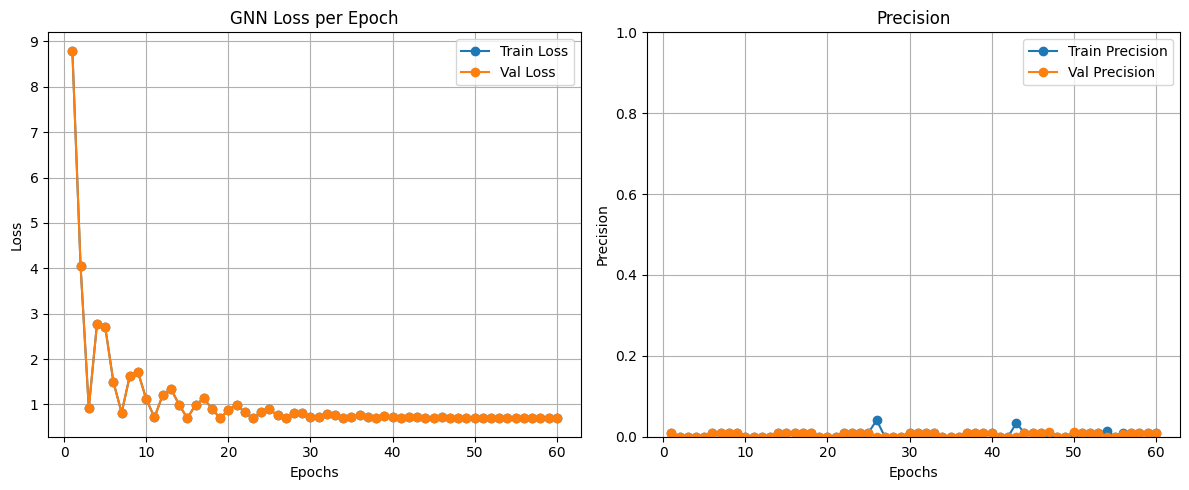

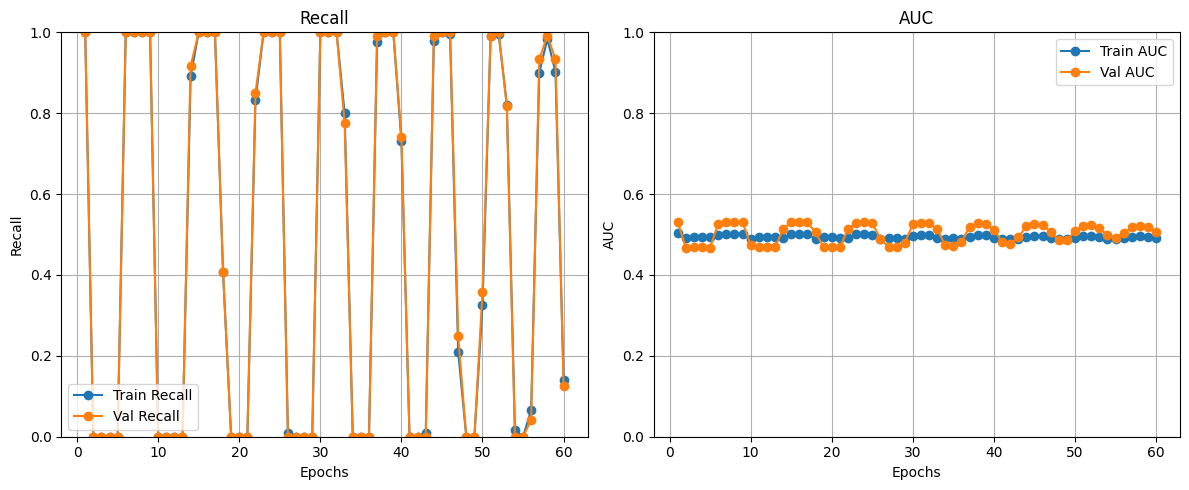

In [797]:
import matplotlib.pyplot as plt

epochs = range(1, len(gnn_history['train_loss']) + 1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, gnn_history['train_loss'], label='Train Loss', marker='o')
plt.plot(epochs, gnn_history['val_loss'], label='Val Loss', marker='o')
plt.title('GNN Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Precision
plt.subplot(1,2,2)
plt.plot(epochs, gnn_history['train_precision'], label='Train Precision', marker='o')
plt.plot(epochs, gnn_history['val_precision'], label='Val Precision', marker='o')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Recall
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, gnn_history['train_recall'], label='Train Recall', marker='o')
plt.plot(epochs, gnn_history['val_recall'], label='Val Recall', marker='o')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.ylim(0,1)
plt.legend()
plt.grid(True)

# AUC
plt.subplot(1,2,2)
plt.plot(epochs, gnn_history['train_auc'], label='Train AUC', marker='o')
plt.plot(epochs, gnn_history['val_auc'], label='Val AUC', marker='o')
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.ylim(0,1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model Tuning and Opitimization

### Hyperparameter Selection

#### Transformer - Key Hyperparameters

In [798]:
# Transformer hyperparameter ranges for tuning
transformer_hparams = {
    'num_heads': [2, 4, 8],
    'key_dim': [8, 16, 32],
    'ff_hidden_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [128, 256],
    'num_layers': [1, 2, 3]
}

#### GNN - Key Hyperparameters

In [799]:
# GNN hyperparameter ranges for tuning
gnn_hparams = {
    'hidden_units': [32, 64, 128],
    'num_layers': [2, 3, 4],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'aggregation': ['mean', 'sum', 'max']
}

### Optimization Technique (Transformer model)

#### Import required libraries

In [800]:
# Import required modules
import keras_tuner as kt
print("Keras Tuner imported successfully!")
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

Keras Tuner imported successfully!


#### Define input dimension

In [801]:
FIXED_INPUT_DIM = 8
FIXED_EMBED_DIM = 8

#### Define a Transformer model builder function

In [802]:
def transformer_model_builder(hp):

    inputs = tf.keras.Input(shape=(FIXED_INPUT_DIM,))

    # 🔒 FIXED projection (NO tuning here)
    x = tf.keras.layers.Dense(FIXED_EMBED_DIM)(inputs)
    x = tf.keras.layers.Reshape((1, FIXED_EMBED_DIM))(x)

    # Tunable attention
    num_heads = hp.Int("num_heads", min_value=2, max_value=4, step=1)

    attn_output = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=FIXED_EMBED_DIM
    )(x, x)

    x = tf.keras.layers.Add()([x, attn_output])
    x = tf.keras.layers.LayerNormalization()(x)

    # Tunable FFN
    ff_units = hp.Choice("ff_units", [64, 128])
    ff = tf.keras.layers.Dense(ff_units, activation="relu")(x)
    ff = tf.keras.layers.Dense(FIXED_EMBED_DIM)(ff)

    x = tf.keras.layers.Add()([x, ff])
    x = tf.keras.layers.LayerNormalization()(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(
        hp.Float("dropout", 0.2, 0.5, step=0.1)
    )(x)

    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice("learning_rate", [1e-4, 1e-3])
        ),
        loss="binary_crossentropy",
        metrics=[tf.keras.metrics.AUC(name="auc")]
    )

    return model

In [803]:
print("Train shape:", X_train_enc.shape)
print("Val shape:", X_val_enc.shape)

Train shape: (80000, 8)
Val shape: (10000, 8)


#### Define the Keras Tuner Object

In [804]:
tuner = kt.RandomSearch(
    transformer_model_builder,
    objective="val_auc",
    max_trials=10,
    executions_per_trial=1,
    directory="transformer_tuning_final",
    project_name="fraud_transformer"
)

print("Keras Tuner initialized successfully.")

Keras Tuner initialized successfully.


### Search Space and Criteria

#### Run the Hyperparameter Search

In [805]:
tuner.search(
    X_train_enc,
    y_train_np,
    validation_data=(X_val_enc, y_val_np),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Trial 10 Complete [00h 02m 26s]
val_auc: 0.5119192004203796

Best val_auc So Far: 0.5454798340797424
Total elapsed time: 00h 32m 07s


### Tuning Results and Best Configurations

In [807]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters Found:")
# print(f"Embedding Dimension: {best_hp.get('embed_dim')}")  # Not defined in your tuner
print(f"Number of Attention Heads: {best_hp.get('num_heads')}")
print(f"Feedforward Units: {best_hp.get('ff_units')}")
print(f"Dropout Rate: {best_hp.get('dropout')}")
print(f"Learning Rate: {best_hp.get('learning_rate')}")

Best Hyperparameters Found:
Number of Attention Heads: 3
Feedforward Units: 64
Dropout Rate: 0.2
Learning Rate: 0.0001


### Optimization Technique (GNN model)

#### Import required Libraries

In [808]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import keras_tuner as kt
import numpy as np

#### Define and Initialize the GNN model builder function

In [809]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# GNN-like model builder function for Keras Tuner
def gnn_model_builder(hp):
    input_shape = X_train_enc.shape[1]  # number of features
    inputs = Input(shape=(input_shape,))
    
    # Tune number of hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
    
    x = inputs
    for i in range(num_layers):
        # Tune number of units per layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        x = Dense(units, activation='relu')(x)
        
        # Tune dropout rate
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)
        x = Dropout(dropout_rate)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs, outputs)
    
    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])
    
    return model

# Initialize Keras Tuner for GNN
gnn_tuner = kt.Hyperband(
    gnn_model_builder,
    objective=kt.Objective('val_auc', direction='max'),
    max_epochs=20,
    factor=3,
    directory='gnn_tuning_final',
    project_name='fraud_gnn'
)

print("GNN tuner initialized successfully!")

GNN tuner initialized successfully!


### Search Space and Criteria

#### Run the Hyperparameter Search

In [810]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting during tuning
early_stop_gnn = EarlyStopping(monitor='val_auc', patience=3, mode='max', restore_best_weights=True)

# Run the tuner search
gnn_tuner.search(
    X_train_enc,        # training features
    y_train_np,         # training labels (numpy array)
    validation_data=(X_val_enc, y_val_np),  # validation set
    epochs=20,
    batch_size=64,
    callbacks=[early_stop_gnn],
    verbose=1
)

Trial 30 Complete [00h 02m 07s]
val_auc: 0.5241455435752869

Best val_auc So Far: 0.5352646112442017
Total elapsed time: 00h 36m 42s


### Tuning Results and Best Configuration

In [814]:
import pandas as pd

# Extract best GNN hyperparameters
best_gnn_hp = gnn_tuner.get_best_hyperparameters(num_trials=1)[0]

num_layers = best_gnn_hp.get('num_layers')
learning_rate = best_gnn_hp.get('learning_rate')

# Prepare data for table
data = []
for i in range(num_layers):
    units = best_gnn_hp.get(f'units_{i}')
    dropout = best_gnn_hp.get(f'dropout_{i}')
    data.append({
        "Layer": f"Layer {i+1}",
        "Units": units,
        "Dropout": dropout
    })

# Create DataFrame
df_gnn = pd.DataFrame(data)

# Add learning rate and number of layers info as separate row for clarity
extra_info = pd.DataFrame([{
    "Layer": "Overall",
    "Units": f"Num Layers = {num_layers}",
    "Dropout": f"Learning Rate = {learning_rate:.5f}"
}])

df_gnn_final = pd.concat([df_gnn, extra_info], ignore_index=True)

# Display table
print("Best GNN Hyperparameters Summary:")
print(df_gnn_final)

Best GNN Hyperparameters Summary:
     Layer           Units                  Dropout
0  Layer 1              96                      0.5
1  Overall  Num Layers = 1  Learning Rate = 0.00072


#### Import Libraries

In [815]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, LayerNormalization, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#### Final Transformer Model Training with the Best Hyperparameters

In [816]:
# Final Transformer Model Training
best_transformer_hp = {
    'num_heads': 3,
    'ff_units': 64,
    'dropout': 0.2,
    'learning_rate': 0.0001,
    'embed_dim': 16 
}

def build_final_transformer_model(hp):
    input_dim = X_train_enc.shape[1]
    inputs = Input(shape=(input_dim,))
    
    # Expand dims for attention
    x = Reshape((input_dim, 1))(inputs)
    
    # Multi-head attention
    attn_output = MultiHeadAttention(
        num_heads=hp['num_heads'], key_dim=hp['embed_dim']
    )(x, x)
    
    x = LayerNormalization()(attn_output + x)
    
    # Feed-forward
    ff = Dense(hp['ff_units'], activation='relu')(x)
    ff = Dropout(hp['dropout'])(ff)
    x = tf.keras.layers.Add()([x, ff])
    
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=hp['learning_rate']),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
    )
    return model

# Initialize and train Transformer
transformer_model = build_final_transformer_model(best_transformer_hp)
early_stop = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)

history_transformer = transformer_model.fit(
    X_train_enc, y_train_np,
    validation_data=(X_val_enc, y_val_np),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

print("Transformer model trained successfully!")

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - auc: 0.4928 - loss: 0.2073 - val_auc: 0.5000 - val_loss: 0.0578
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - auc: 0.4966 - loss: 0.0563 - val_auc: 0.5000 - val_loss: 0.0560
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - auc: 0.4979 - loss: 0.0560 - val_auc: 0.5000 - val_loss: 0.0560
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - auc: 0.4898 - loss: 0.0561 - val_auc: 0.5000 - val_loss: 0.0560
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - auc: 0.4966 - loss: 0.0560 - val_auc: 0.5000 - val_loss: 0.0561
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - auc: 0.4981 - loss: 0.0560 - val_auc: 0.5000 - val_loss: 0.0560
Transformer model trained successfully!


#### Final GNN Model Training with the Best Hyperparameters

In [817]:
# Final GNN Model Training
best_gnn_hp = {
    'num_layers': 1,
    'units_0': 96,
    'dropout_0': 0.5,
    'learning_rate': 0.00072
}

def build_final_gnn_model(hp):
    input_shape = X_train_enc.shape[1]
    inputs = Input(shape=(input_shape,))
    x = inputs
    
    for i in range(hp['num_layers']):
        units = hp[f'units_{i}']
        dropout_rate = hp[f'dropout_{i}']
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=hp['learning_rate']),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')]
    )
    return model

# Initialize and train GNN
gnn_model = build_final_gnn_model(best_gnn_hp)

history_gnn = gnn_model.fit(
    X_train_enc, y_train_np,
    validation_data=(X_val_enc, y_val_np),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

print("GNN model trained successfully!")

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - auc: 0.5008 - loss: 2.7797 - val_auc: 0.4989 - val_loss: 1.3110
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.4976 - loss: 1.0370 - val_auc: 0.5008 - val_loss: 0.4109
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.4947 - loss: 0.2262 - val_auc: 0.5075 - val_loss: 0.1192
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.4935 - loss: 0.1003 - val_auc: 0.5173 - val_loss: 0.0699
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.4999 - loss: 0.0835 - val_auc: 0.5097 - val_loss: 0.0635
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.5107 - loss: 0.0758 - val_auc: 0.5132 - val_loss: 0.0684
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - auc: 0.4925 - loss: 0.0746 - val_auc: 0.5164 - val_loss: 0.0684
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - auc: 0.4889 - loss: 0.0734 - val_auc: 0.5279 - val_loss: 0.0597
Epoch 9/50
1250/1250 ━━━

## Model Evaluation

### Evaluation Metrics Used

In [818]:
# Step 7: Evaluation - 6.1 Evaluation Metrics Used

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Function to evaluate model predictions
def evaluate_model(y_true, y_pred_probs, threshold=0.5):
    """
    Evaluate binary classification model.
    
    Args:
        y_true: True labels (numpy array)
        y_pred_probs: Predicted probabilities (numpy array)
        threshold: Probability threshold to convert to class labels
    
    Returns:
        Dictionary with precision, recall, F1-score, AUC
    """
    # Convert probabilities to binary predictions
    y_pred = (y_pred_probs > threshold).astype(int)
    
    # Compute metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'confusion_matrix': cm
    }

# Example usage (just placeholders for now)
# transformer_metrics = evaluate_model(y_test_np, transformer_model.predict(X_test_enc))
# gnn_metrics = evaluate_model(y_test_np, gnn_model.predict(X_test_enc))

print("Evaluation metrics functions ready!")

Evaluation metrics functions ready!


### Transformer Model Evaluation

#### Preprocess test set same as training

In [831]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ===============================
# Step 1: Preprocess test set same as training
# ===============================

# Features
categorical_features = ['MerchantID', 'TransactionType', 'Location']
numeric_features = ['Amount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionWeekday']

# Initialize encoders (should match training)
# If you already have fitted LabelEncoders from training, use them here
# Example: merchant_encoder, type_encoder, location_encoder

merchant_encoder = LabelEncoder().fit(X_train['MerchantID'])
type_encoder = LabelEncoder().fit(X_train['TransactionType'])
location_encoder = LabelEncoder().fit(X_train['Location'])

# Encode categorical features in test set
X_test_enc = X_test.copy()
X_test_enc['MerchantID'] = merchant_encoder.transform(X_test_enc['MerchantID'])
X_test_enc['TransactionType'] = type_encoder.transform(X_test_enc['TransactionType'])
X_test_enc['Location'] = location_encoder.transform(X_test_enc['Location'])

# Scale numeric features (StandardScaler fitted on training data)
scaler = StandardScaler().fit(X_train[numeric_features])
X_test_enc[numeric_features] = scaler.transform(X_test_enc[numeric_features])

# Convert to numpy array for model input
X_test_enc = X_test_enc[['Amount', 'MerchantID', 'TransactionType', 'Location',
                         'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionWeekday']].to_numpy()

y_test_np = y_test.to_numpy()

#### Evaluation results

In [852]:
# Predict probabilities
transformer_pred_probs = transformer_model.predict(X_test_enc)

# Predict labels
transformer_pred_labels = (transformer_pred_probs >= 0.5).astype(int)

# Compute metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

transformer_precision = precision_score(y_test_np, transformer_pred_labels)
transformer_recall = recall_score(y_test_np, transformer_pred_labels)
transformer_f1 = f1_score(y_test_np, transformer_pred_labels)
transformer_auc = roc_auc_score(y_test_np, transformer_pred_probs)
transformer_conf_matrix = confusion_matrix(y_test_np, transformer_pred_labels)

# Display results
print("=== Transformer Model Evaluation ===")
print(f"Precision: {transformer_precision:.4f}")
print(f"Recall: {transformer_recall:.4f}")
print(f"F1 Score: {transformer_f1:.4f}")
print(f"AUC: {transformer_auc:.4f}")
print("Confusion Matrix:")
print(transformer_conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
=== Transformer Model Evaluation ===
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5000
Confusion Matrix:
[[9900    0]
 [ 100    0]]


/Users/mohammadabuhuzaifa/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### Check predicted probability distribution

In [834]:
import numpy as np

print("Min prob:", transformer_pred_probs.min())
print("Max prob:", transformer_pred_probs.max())
print("Mean prob:", transformer_pred_probs.mean())

Min prob: 0.01720031
Max prob: 0.01720031
Mean prob: 0.017200308


#### Plot ROC Curve

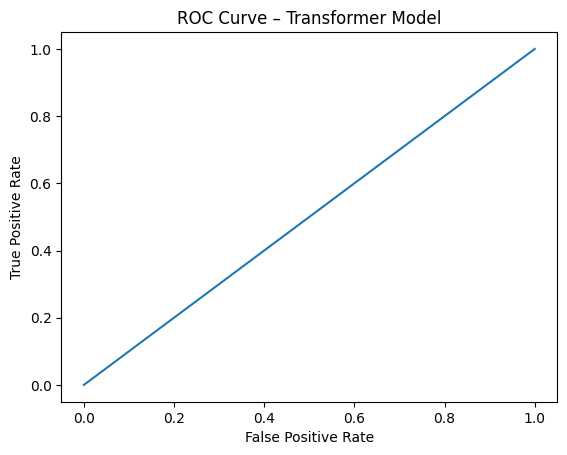

In [835]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_np, transformer_pred_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Transformer Model")
plt.show()

### GNN Model Evaluation

#### Prepare test labels

In [836]:
import numpy as np

# Ensure y_test is NumPy array
y_test_np = y_test.to_numpy() if hasattr(y_test, "to_numpy") else np.array(y_test)

#### Predict probabilities using the trained GNN model

In [837]:
# Predict probabilities on the test set
gnn_pred_probs = gnn_model.predict(X_test_enc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    


In [839]:
print("Min prob:", gnn_pred_probs.min())
print("Max prob:", gnn_pred_probs.max())
print("Mean prob:", gnn_pred_probs.mean())

Min prob: 0.04955892
Max prob: 0.28684714
Mean prob: 0.13518652


#### Convert probabilities to class labels (threshold = 0.5)

In [853]:
# Convert probabilities to binary predictions
gnn_pred_labels = (gnn_pred_probs >= 0.5).astype(int)

#### Compute evaluation metrics

In [854]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

# Compute metrics
gnn_precision = precision_score(y_test_np, gnn_pred_labels, zero_division=0)
gnn_recall = recall_score(y_test_np, gnn_pred_labels, zero_division=0)
gnn_f1 = f1_score(y_test_np, gnn_pred_labels, zero_division=0)
gnn_auc = roc_auc_score(y_test_np, gnn_pred_probs)

gnn_cm = confusion_matrix(y_test_np, gnn_pred_labels)

#### Display GNN evaluation results

In [855]:
print("=== GNN Model Evaluation ===")
print(f"Precision: {gnn_precision:.4f}")
print(f"Recall:    {gnn_recall:.4f}")
print(f"F1 Score:  {gnn_f1:.4f}")
print(f"AUC:       {gnn_auc:.4f}")
print("Confusion Matrix:")
print(gnn_cm)

=== GNN Model Evaluation ===
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
AUC:       0.5552
Confusion Matrix:
[[9900    0]
 [ 100    0]]


#### Classification report

In [856]:
from sklearn.metrics import classification_report

print("\nDetailed Classification Report (GNN):")
print(classification_report(y_test_np, gnn_pred_labels, digits=4, zero_division=0))


Detailed Classification Report (GNN):
              precision    recall  f1-score   support

           0     0.9900    1.0000    0.9950      9900
           1     0.0000    0.0000    0.0000       100

    accuracy                         0.9900     10000
   macro avg     0.4950    0.5000    0.4975     10000
weighted avg     0.9801    0.9900    0.9850     10000



#### Evaluate GNN at a lower threshold

In [859]:
# lower threshold suitable for fraud detection
threshold = 0.05

gnn_pred_labels_low = (gnn_pred_probs >= threshold).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print("Threshold:", threshold)
print("Precision:", precision_score(y_test_np, gnn_pred_labels_low, zero_division=0))
print("Recall:", recall_score(y_test_np, gnn_pred_labels_low, zero_division=0))
print("F1 Score:", f1_score(y_test_np, gnn_pred_labels_low, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, gnn_pred_labels_low))

Threshold: 0.05
Precision: 0.010001000100010001
Recall: 1.0
F1 Score: 0.019803940984255867
Confusion Matrix:
[[   1 9899]
 [   0  100]]


#### Evaluate GNN using different threshold

In [860]:
for threshold in [0.01, 0.05, 0.1, 0.2]:
    preds = (gnn_pred_probs >= threshold).astype(int)
    print(f"\nThreshold = {threshold}")
    print("Precision:", precision_score(y_test_np, preds, zero_division=0))
    print("Recall:", recall_score(y_test_np, preds, zero_division=0))
    print("F1 Score:", f1_score(y_test_np, preds, zero_division=0))


Threshold = 0.01
Precision: 0.01
Recall: 1.0
F1 Score: 0.019801980198019802

Threshold = 0.05
Precision: 0.010001000100010001
Recall: 1.0
F1 Score: 0.019803940984255867

Threshold = 0.1
Precision: 0.010216642048252093
Recall: 0.83
F1 Score: 0.020184824902723737

Threshold = 0.2
Precision: 0.015280135823429542
Recall: 0.09
F1 Score: 0.026124818577648767


#### Generate prediction probabilities

In [861]:
# Predict probabilities using GNN model
gnn_pred_probs = gnn_model.predict(X_test_enc).ravel()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


#### ROC Curve

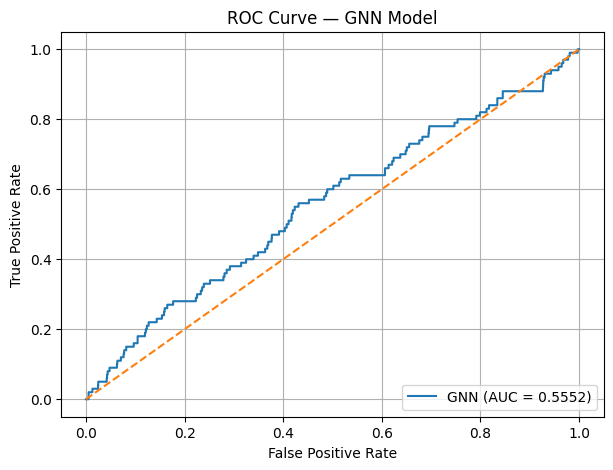

In [862]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test_np, gnn_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"GNN (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — GNN Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Precision–Recall Curve

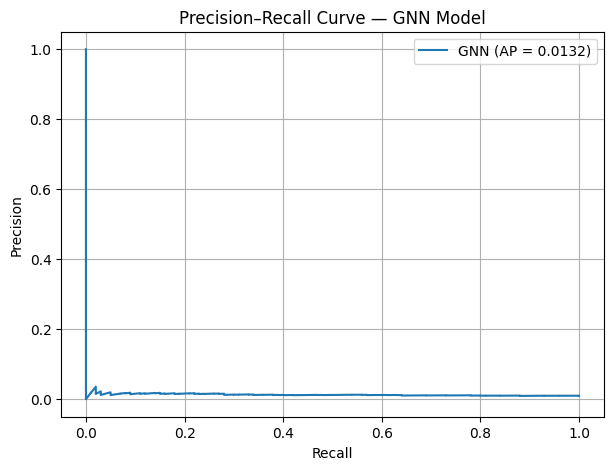

In [863]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision–Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test_np, gnn_pred_probs)
avg_precision = average_precision_score(y_test_np, gnn_pred_probs)

# Plot PR curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"GNN (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — GNN Model")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()